0. Previous steps.

0.1. Loading Packages.

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white, het_goldfeldquandt, het_breuschpagan
from statsmodels.regression.linear_model import OLS

0.2. Loading Dataframes.

In [230]:
#Loading dependent variables

df_names = ["average_wage", "labor_force_thousands", "population_millions",
            "unemployment_rate", "working_age_population"]

path = ".../Dependent Variables.xlsx"

for i, name in enumerate(df_names):
    df = pd.DataFrame(pd.read_excel(path, sheet_name=i))
    globals()[name] = df

In [231]:
#Loading independent variables

df_names_2 = ["gdp", "economic_freedom_index", "inflation_rate", "long_term_interest_rates", "min_inc_as_per_of_med_inc_couple_2C",
              "min_inc_as_per_of_med_inc_couple_NC", "min_inc_as_per_of_med_inc_single_2C", "min_inc_as_per_of_med_inc_single_NC", "in_cash_transfers_households",
              "in_kind_transfers_households", "public_spending_family_benefits", "public_spending_unemployment_benefits", "self_employment_as_per_employment",
              "short_term_interest_rates", "social_public_spending", "temp_employment_as_per_employment", "unemployment_benefits_as_per_previos_inc_1Y",
              "unemployment_benefits_as_per_previos_inc_2M", "unemployment_benefits_as_per_previos_inc_2Y", "unemployment_benefits_as_per_previos_inc_5Y",
              "unemployment_benefits_as_per_previos_inc_6M"]

path_2 = ".../Independent Variables.xlsx"

for i, name2 in enumerate(df_names_2):
    df2 = pd.DataFrame(pd.read_excel(path_2, sheet_name=i))
    globals()[name2] = df2

1. Data Modeling and preparation.

1.1. Data melting.

In [232]:
df_list = [average_wage, labor_force_thousands, population_millions, 
           unemployment_rate, working_age_population]

# Create dictionary using zip
df_dict = {df_names[0] : df_list[0],
           df_names[1] : df_list[1],
           df_names[2] : df_list[2],
           df_names[3] : df_list[3],
           df_names[4] : df_list[4]}

for name, dataframe in df_dict.items():
    df = pd.melt(dataframe, id_vars='Country', var_name='Year', value_name='observation')
    globals()[name] = df

In [233]:
df_names_2_a = ["gdp", "inflation_rate", "long_term_interest_rates", "min_inc_as_per_of_med_inc_couple_2C",
              "min_inc_as_per_of_med_inc_couple_NC", "min_inc_as_per_of_med_inc_single_2C", "min_inc_as_per_of_med_inc_single_NC", "in_cash_transfers_households",
              "in_kind_transfers_households", "public_spending_family_benefits", "public_spending_unemployment_benefits", "self_employment_as_per_employment",
              "short_term_interest_rates", "social_public_spending", "temp_employment_as_per_employment", "unemployment_benefits_as_per_previos_inc_1Y",
              "unemployment_benefits_as_per_previos_inc_2M", "unemployment_benefits_as_per_previos_inc_2Y", "unemployment_benefits_as_per_previos_inc_5Y",
              "unemployment_benefits_as_per_previos_inc_6M"]

df_list_2_a = [gdp, inflation_rate, long_term_interest_rates, min_inc_as_per_of_med_inc_couple_2C,
 min_inc_as_per_of_med_inc_couple_NC, min_inc_as_per_of_med_inc_single_2C, min_inc_as_per_of_med_inc_single_NC, 
 in_cash_transfers_households, in_kind_transfers_households, public_spending_family_benefits, 
 public_spending_unemployment_benefits, self_employment_as_per_employment, short_term_interest_rates, 
 social_public_spending, temp_employment_as_per_employment, unemployment_benefits_as_per_previos_inc_1Y, 
 unemployment_benefits_as_per_previos_inc_2M, unemployment_benefits_as_per_previos_inc_2Y, 
 unemployment_benefits_as_per_previos_inc_5Y, unemployment_benefits_as_per_previos_inc_6M]

df_dict_2_a = dict(zip(df_names_2_a, df_list_2_a))

for name, dataframe in df_dict_2_a.items():
    df = pd.melt(dataframe, id_vars="Country", var_name='Year', value_name='observation')
    globals()[name] = df

economic_freedom_index = economic_freedom_index.rename(columns={'Name':'Country'})
economic_freedom_index = economic_freedom_index.drop('Id', axis=1)
economic_freedom_index.rename(columns={'Overall Score':'economic_freedom_index'}, inplace=True)

1.2. Joining dataframes.

In [234]:
#Renaming Variables

df_name_full = ["average_wage", "labor_force_thousands", "population_millions", "unemployment_rate", "working_age_population",
 "gdp", "inflation_rate", "long_term_interest_rates", "min_inc_as_per_of_med_inc_couple_2C",
 "min_inc_as_per_of_med_inc_couple_NC", "min_inc_as_per_of_med_inc_single_2C", "min_inc_as_per_of_med_inc_single_NC", 
 "in_cash_transfers_households", "in_kind_transfers_households", "public_spending_family_benefits", 
 "public_spending_unemployment_benefits", "self_employment_as_per_employment", "short_term_interest_rates", 
 "social_public_spending", "temp_employment_as_per_employment", "unemployment_benefits_as_per_previos_inc_1Y", 
 "unemployment_benefits_as_per_previos_inc_2M", "unemployment_benefits_as_per_previos_inc_2Y", 
 "unemployment_benefits_as_per_previos_inc_5Y", "unemployment_benefits_as_per_previos_inc_6M", "economic_freedom_index"]

df_list_full = [average_wage, labor_force_thousands, population_millions, unemployment_rate, working_age_population,
 gdp, inflation_rate, long_term_interest_rates, min_inc_as_per_of_med_inc_couple_2C,
 min_inc_as_per_of_med_inc_couple_NC, min_inc_as_per_of_med_inc_single_2C, min_inc_as_per_of_med_inc_single_NC, 
 in_cash_transfers_households, in_kind_transfers_households, public_spending_family_benefits, 
 public_spending_unemployment_benefits, self_employment_as_per_employment, short_term_interest_rates, 
 social_public_spending, temp_employment_as_per_employment, unemployment_benefits_as_per_previos_inc_1Y, 
 unemployment_benefits_as_per_previos_inc_2M, unemployment_benefits_as_per_previos_inc_2Y, 
 unemployment_benefits_as_per_previos_inc_5Y, unemployment_benefits_as_per_previos_inc_6M, economic_freedom_index]

dict_full = dict(zip(df_name_full, df_list_full))

for name, df in dict_full.items():
    df.rename(columns={'observation':name}, inplace=True)

#Joining dataframes

df_list_full_wout_avgwage = [labor_force_thousands, population_millions, unemployment_rate, working_age_population,
 gdp, inflation_rate, long_term_interest_rates, min_inc_as_per_of_med_inc_couple_2C,
 min_inc_as_per_of_med_inc_couple_NC, min_inc_as_per_of_med_inc_single_2C, min_inc_as_per_of_med_inc_single_NC, 
 in_cash_transfers_households, in_kind_transfers_households, public_spending_family_benefits, 
 public_spending_unemployment_benefits, self_employment_as_per_employment, short_term_interest_rates, 
 social_public_spending, temp_employment_as_per_employment, unemployment_benefits_as_per_previos_inc_1Y, 
 unemployment_benefits_as_per_previos_inc_2M, unemployment_benefits_as_per_previos_inc_2Y, 
 unemployment_benefits_as_per_previos_inc_5Y, unemployment_benefits_as_per_previos_inc_6M, economic_freedom_index]

data = average_wage

for df in df_list_full_wout_avgwage:
    data = data.merge(df, on=['Country', 'Year'], how='outer')

1.3. Standarizing Variables and Dealing with NaN Values.

In [235]:
#First, we repair some variables that are supposed to be numeric, but that are found in other dtypes.

repair_var = ['Year', 'labor_force_thousands', 'gdp', 'inflation_rate']

for var in repair_var:
    data[var] = pd.to_numeric(data[var], errors='coerce')

#We define labor force over working age population in order to have a proportional indicator of the labor force in each country.

data['labor_force_over_working_age_pop'] = (data['labor_force_thousands']*100000) / (data['working_age_population']*1000000)

df_name_full.append('labor_force_over_working_age_pop')

#We will deal with NaN values through interpolation and then fillin the remainin NaN values with the mean()

def nandeal(data, column):
    data[column] = data[column].interpolate(method='linear')
    data[column] = data[column].fillna(data[column].mean())

    return data

list_of_df = []

g = data.groupby('Country')

for country, country_df in g:
    country = nandeal(country_df, df_name_full)
    list_of_df.append(country)

data_cleaned = pd.concat(list_of_df, ignore_index=True).dropna()

def standarize(data, column):
    data[column] = (data[column] - data[column].mean()) / data[column].std()

    return data

list_of_df_cleaned = []

g_cleaned = data_cleaned.groupby('Country')

for country, country_df in g_cleaned:
    country = standarize(country_df, df_name_full)
    list_of_df_cleaned.append(country)

data_cleaned_standarized = pd.concat(list_of_df_cleaned, ignore_index=True).dropna()


2. Exploratory Analysis.

2.1. Building some linear regressions.

In [236]:
z = data_cleaned_standarized['unemployment_rate']

g = data_cleaned_standarized[[
    'average_wage',
    'in_cash_transfers_households',
    'in_kind_transfers_households',
    'public_spending_unemployment_benefits',
    'public_spending_family_benefits',
    'social_public_spending',
    'min_inc_as_per_of_med_inc_single_NC',
    'temp_employment_as_per_employment',
    'unemployment_benefits_as_per_previos_inc_2M',
    'unemployment_benefits_as_per_previos_inc_1Y'
]]

g = sm.add_constant(g)

model_2 = sm.OLS(z, g).fit()

summary_2 = model_2.summary()

model_residuals = model_2.resid
model_exog = model_2.model.exog

bp_test = het_breuschpagan(model_residuals, model_exog)
bp_result = {'Lagrange multiplier statistic': bp_test[0], 'p-value': bp_test[1], 'f-value': bp_test[2], 'f p-value': bp_test[3]}
print(bp_result)

gq_test = het_goldfeldquandt(model_residuals, model_exog)
gq_result = {'f-value': gq_test[0], 'p-value': gq_test[1]}
print(gq_result)

white_test = het_white(model_residuals, model_exog)
white_result = {'Test Statistic': white_test[0], 'Test Statistic p-value': white_test[1], 'f-value': white_test[2], 'f p-value': white_test[3]}
print(white_result)

summary_2

{'Lagrange multiplier statistic': 36.438493164407525, 'p-value': 7.074946679855083e-05, 'f-value': 3.7310036891146905, 'f p-value': 6.081252800121637e-05}
{'f-value': 1.1549939829188371, 'p-value': 0.04734251724368134}
{'Test Statistic': 168.32331087338034, 'Test Statistic p-value': 4.199893401012754e-11, 'f-value': 2.873996386123887, 'f p-value': 2.721902560749585e-12}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      unemployment_rate   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     73.40
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.43e-114
Time:                        22:37:44   Log-Likelihood:                -1264.8
No. Observations:                1100   AIC:                             2552.
Df Residuals:                    1089   BIC:                             2607.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -2.064e-16      0.023  -8.92e-15      1.000      -0.045       0.045
average_wage                                   -0.2022      0.029     -6.956      0.000      -0.259      -0.145
in_cash_transfers_households                    0.2164      0.029      7.356      0.000       0.159       0.274
in_kind_transfers_households                    0.0702      0.026      2.666      0.008       0.019       0.122
public_spending_unemployment_benefits           0.3732      0.028     13.401      0.000       0.319       0.428
public_spending_family_benefits                -0.1177      0.032     -3.661      0.000      -0.181      -0.055
social_public_spending                          0.0933      0.038      2.466      0.014       0.019       0.167
min_inc_as_per_of_med_inc_single_NC             0.1022      0.026      4.005      0.000       0.052       0.152
temp_employment_as_per_employment               0.1474      0.024      6.097      0.000       0.100       0.195
unemployment_benefits_as_per_previos_inc_2M    -0.1030      0.031     -3.368      0.001      -0.163      -0.043
unemployment_benefits_as_per_previos_inc_1Y     0.1467      0.031      4.674      0.000       0.085       0.208
==============================================================================
Omnibus:                       24.424   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.303
Skew:                           0.129   Prob(JB):                     2.40e-10
Kurtosis:                       3.949   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.2. Solving autocorrelation and heteroscedasticity problems.

2.2.1. Plotting ACF & PACF.

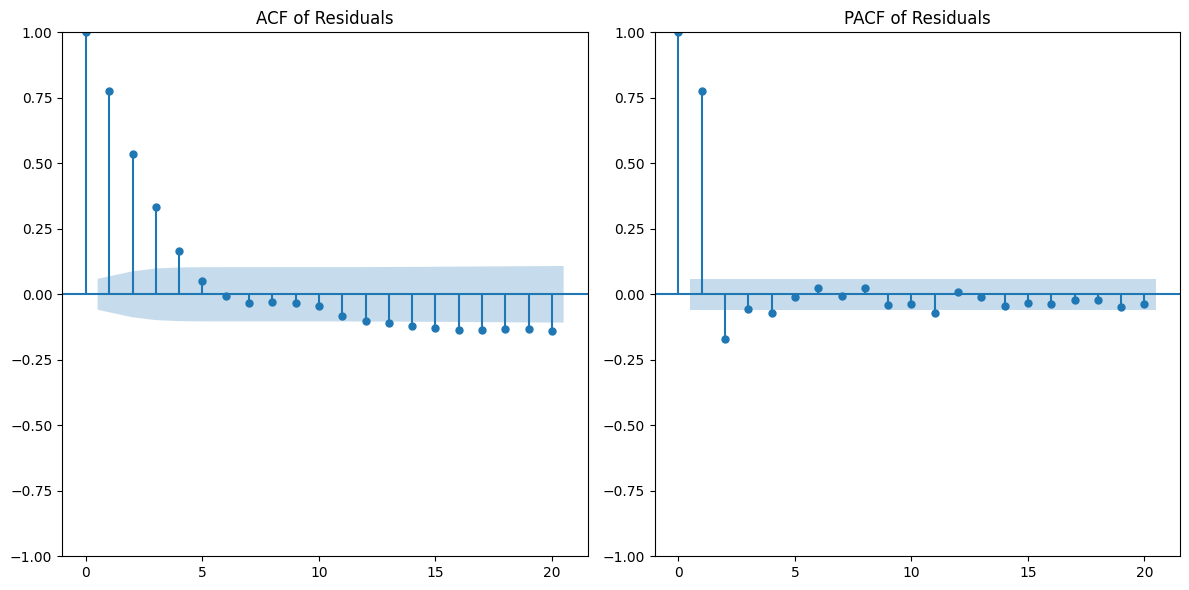

In [239]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(model_residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')
plt.subplot(122)
plot_pacf(model_residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')
plt.tight_layout()
plt.show()

2.2.2. Building a regression robust to autocorrelation and heteroscedasticity.

In [238]:
robust_model = model_2.get_robustcov_results(cov_type='HAC', maxlags=2)
robust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      unemployment_rate   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     34.32
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.08e-58
Time:                        22:59:47   Log-Likelihood:                -1264.8
No. Observations:                1100   AIC:                             2552.
Df Residuals:                    1089   BIC:                             2607.
Df Model:                          10                                         
Covariance Type:                  HAC                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -2.064e-16      0.036  -5.79e-15      1.000      -0.070       0.070
average_wage                                   -0.2022      0.047     -4.287      0.000      -0.295      -0.110
in_cash_transfers_households                    0.2164      0.043      5.085      0.000       0.133       0.300
in_kind_transfers_households                    0.0702      0.040      1.739      0.082      -0.009       0.149
public_spending_unemployment_benefits           0.3732      0.047      7.896      0.000       0.280       0.466
public_spending_family_benefits                -0.1177      0.046     -2.544      0.011      -0.208      -0.027
social_public_spending                          0.0933      0.053      1.763      0.078      -0.011       0.197
min_inc_as_per_of_med_inc_single_NC             0.1022      0.037      2.755      0.006       0.029       0.175
temp_employment_as_per_employment               0.1474      0.034      4.372      0.000       0.081       0.214
unemployment_benefits_as_per_previos_inc_2M    -0.1030      0.048     -2.134      0.033      -0.198      -0.008
unemployment_benefits_as_per_previos_inc_1Y     0.1467      0.050      2.956      0.003       0.049       0.244
==============================================================================
Omnibus:                       24.424   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.303
Skew:                           0.129   Prob(JB):                     2.40e-10
Kurtosis:                       3.949   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 2 lags and without small sample correction
"""